## PDC Project
This project aims to create a transmitter and reciever that is able to reconstruct a message that was exposed by a channel effect.

In [1]:
import client
import channel_helper
import transmitter
import reciever

import matplotlib.pyplot as plt
import numpy as np

### Transmitter
The Transmitter first creates a codeword based on the 8 Bit Ascii table. For bit syncronization a predefined pattern consisting of 16 Bit with value of 1 is used. After that the codeword is transformed into a waveform. The basis function of the waveform former is a root raised cosine function. Furthermore the value 0 in the bit sequence is replaced by -1 for a better error probability. Finally the signal is shifted in the frequency domain in order to fit the requirements of the Channel-Effect.

In [2]:
%%time 
transmitter.run()

Creating waveform...

Time for function waveform_former:
0.014154999999999918

Time for function passband:
0.8691129999999998

CPU times: user 1.08 s, sys: 70.7 ms, total: 1.15 s
Wall time: 1.18 s


### Channel Effect

In [3]:
!python client.py --input_file=passband.txt --output_file=output.txt --srv_hostname=iscsrv72.epfl.ch --srv_port=80

### Reciever
The Reciever takes the noisy version of the signal and first shift it back to the original frequency. After that a lowpass filter is applied with is then used to filter the noise. Because the channel applies a delay on the sequence the starting position is determined by using a convolution for the bit sequence consisting of 8 pulses with itensity 1. After that the inner product is computed to reconstruct the message using a matched filter. 

In [4]:
%%time
reciever.run()

Reconstructing Signal...

In 4000 Hz Frequency

Time for frequency Selection:
0.4755609999999999

Time for finding startpoint and endpoint in time domain:
5.823769

Time for function inner_product:
0.19436900000000001

Number of Correct Bits (among received ones): 1544/1544

Decoded recieved signal: 
The best form of education is that which we can obtain from ourselves, our own curiosity and our own experience, so keep looking for "new" things whether they are new or not, and keep learning!

Original text: 
The best form of education is that which we can obtain from ourselves, our own curiosity and our own experience, so keep looking for "new" things whether they are new or not, and keep learning!

Done...

CPU times: user 6.97 s, sys: 194 ms, total: 7.17 s
Wall time: 4.75 s


### Plots
In the following part the plots of the convolution with the frequency shifted sinc are shown. Here one can see if one of the frequences being earased!

In [5]:
def compute_array(datapath):
    f = open(datapath, 'r')
    array = f.read().split('\n')
    length = len(array)
    plot_array = array[:(length-1)]
    
    
    plot_array = list(map(float, plot_array))
    return plot_array


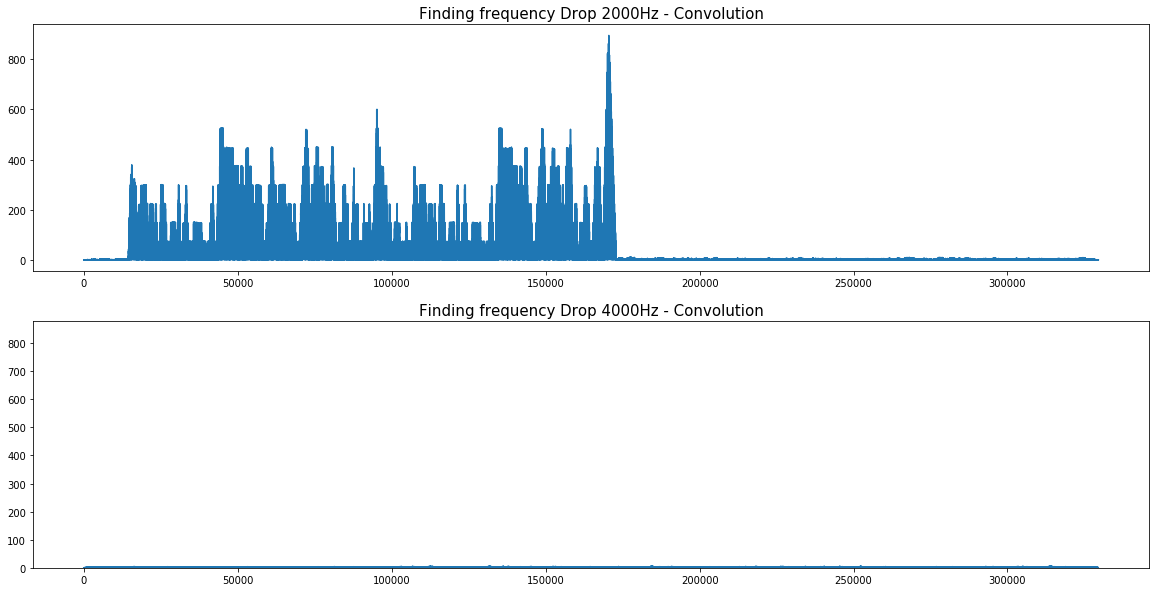

In [6]:
fig, ax = plt.subplots(2, figsize=(20,10))

passband = compute_array("test1.txt")
output = compute_array("test2.txt")



ax[0].plot(passband)
ax[0].set_title('Finding frequency Drop 2000Hz - Convolution', fontsize = 15)
ax[1].plot(output)
ax[1].set_title('Finding frequency Drop 4000Hz - Convolution', fontsize = 15)
ax[1].axes.set_ylim([0,880])



plt.show()